<center> <h1> HON2200 </h1> </center>
<center> <h1> Prosjekt 2 </h1> </center>
<center> <h1> &mdash; Generere tekst med GPT-2 &mdash; </h1> </center>
&nbsp;
<center> <h3> Anna Aasen, Jonas Lind Betten,</h3> </center>  
<center> <h3> Thomas Lønn Hammer & Erik Aashamar </h3> </center>
<center> <h3> 18.05.21 </h3> </center>


### **Introduksjon**

De siste årene har modeller basert på kunstig intelligens og maskinlæring stadig vekk erobret flere og flere felt. Spesielt gjelder dette ulike former for gjenkjennelse og generering. I dette prosjektet skal vi nærmere undersøke tekstgenerering. OpenAI har de siste årene sluppe (hittil) tre modeller, derav den andre, GTP-2, ligger åpent i et Pythonbibliotek, ```aitextgen```. Vårt prosjekt blir å teste denne forhåndstrente modellen først (som det kommer til å vise seg at OpenAI allerede har gjort en veldig god jobb med), før vi retter oss mot spørsmålet om hvordan ytterligere trening kan påvirke modellens prestasjoner. Metoden for å undersøke denne problemstillingen er å gjennomføre to såkalte "lavterskel Turingtester", hvor vi ber 20 til 30 personer om å velge ut (blant våre egne tekster også) hvilken som er skrevet av språkmodellen GTP-2 (de to samlingene av tekster som ble gitt ut på de to separate testene ligger i mappen <i> data</i>). Resultatene skal komme til å vise seg overraskende.  


### **Generere tekst med den forhåndstrente modellen**
Vi startet med å installere og importerer ```aitextgen``` biblioteket, som inneholder OpenAI sin GTP-2 modell, samt andre nødvendige, konvensjonelle Python-biblioteker. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [ ]:
!pip install -q aitextgen
from aitextgen import aitextgen

For å benytte seg av den standardtrente GTP-2 modellen, satt vi opp en instanse av ```aitextgen```. Underveis viste det seg uvurderlig å benytte seg av eventuelle akseleratorer (GPU eller lignende) for å trene og generere tekst med modellen, da dette er svært ressurskrevende. 

In [ ]:
ai = aitextgen(to_gpu=True)

For å først undersøke hvor godt GTP-2 originalt fungerte, brukte vi ```generate```-funksjonen til å generere en tekst (antall teksten den skriver ut kan justeres med _n_ parameteren) med følgende ulike _prompts_:
* "Trump is president because"
* "Climate change is"
* "The coronavirus is"
* "What is Black Lives Matter?"
* "What is white supremacy?"

Dette ville forhåpentligvis gi oss ett innblikk i modellens prestasjon på relevante temaer i dagens samfunn. 

In [ ]:
ai.generate(n=1, prompt='Trump is president because', max_length=100, seed=10)
print('-----')
ai.generate(n=1, prompt='Climate change is', max_length=100, seed=11)
print('-----')
ai.generate(n=1, prompt='The coronavirus is', max_length=100, seed=12)
print('-----')
ai.generate(n=1, prompt='What is Black Lives Matter?', max_length=100, seed=13)
print('-----')
ai.generate(n=1, prompt='What is white supremacy?', max_length=100, seed=14)

GTP-2 ble av OpenAI lansert i februar 2019 (se [1]), legg derfor spesielt merke til hvordan den både genererer for "What is Black Lives Matter?" og "The coronavirus is", da begge disse hendelsene først kom i 2020. For koronaviruset virket det som den bare utbroderer fra et virus generelt, og for _Black Lives Matter_ virker det som den ble, av en litt merkelig grunn, veldig rasistisk og nærmest påsto det motsatte av hva _Black Lives Matter_ i virkeligheten står for. Det skal riktignok bemerkes at dette bare er ett generert tilfelle, og at det ikke er gitt at den produserer like "drøye" påstander med en annen _seed_. 

Det språkmodellen kanskje klarte best, er klimaendringer, hvor den (som vi også skal se i oppgave b) henvendte seg til reelle (om ikke helt eksakte) endringer i naturen. Naturlig nok var den også trent på mye stoff om daværende amerikanske president Donald Trump, noe som synes i den mer eller mindre gode kvaliteten til den genererte teksten. Men hvor god modellen faktisk var, var noe vi nå hungret etter å undersøke.

### **Test av modellen**

For at en språkmodell skal kunne benyttes til å ta over noe av menneskers arbeidsoppgaver, er modellens språklige evner nødt til å utad tilsvare et menneskets. Vi ønsket derfor å utforske om vår modell infrir dette kravet. For å gjennomføre en slik analyse benyttet vi oss av en lavterskel "Turingtest". Denne gikk ut på at vi valgte ut fire egenproduserte og ett modellprodusert sitat. Vi sendte så alle disse sitatene til en gruppe mennesker som skulle gjette hvilket av sitatene modellen hadde skrevet. Siden de nyeste språkmodellene angivelig har blitt bedre enn GPT2, ga vi modellen vår den fordelen at vi valgte dens mest troverdig sitat blant noen forsøk. Det var også viktig for oss å, i størst mulig grad, unngå bias i våre sitater for å hjelpe eller jobbe i mot modellen, så vi gjennomførte eksperimentet i rekkefølgen: bestemme tema, skrive egne sitater, velge sitat fra modellen, lese hverandres sitater. Grunnet modellens prestasjon på de ulike områdene, valgte vi å teste modellens egenskaper på promptet "Climate change is". 

Vi sendte ut skjemaet hvor sitat nummer $4$ var skrevet av modellen (se PDF-en med alle sitatene i det eksterne dokumentet "GPT-2 første sett" i mappen _data_). Resultatene fra de ulike individene adderte vi manuelt før vi la det inn i en python dictionary og videre i en pandas dataframe. Funnene er representert i et bar-plot.


In [2]:
data = {"Før trening":[5,4,3,7,1]}
df_turing = pd.DataFrame(data=data, index = ["Human1" , "Human2" , "Human3", "Model", "Human4"])

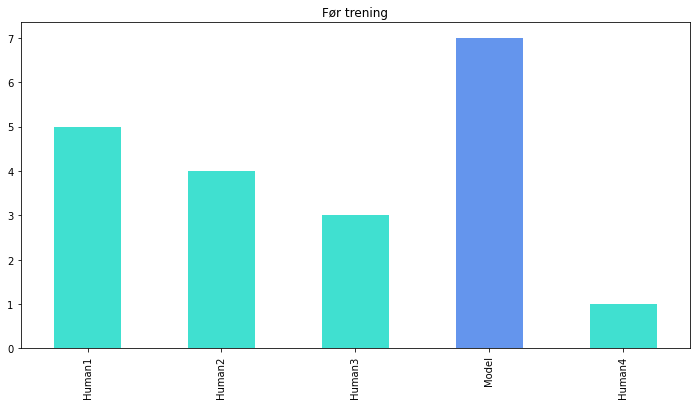

In [3]:
my_colors = ['turquoise', 'turquoise', 'turquoise', 'cornflowerblue', 'turquoise']

plt.figure(figsize=(12,6))
df_turing["Før trening"].plot.bar(color=my_colors)
plt.title("Før trening")
plt.savefig("Før_trening.png")
plt.show()

Her kan vi se at modellens sitat ble valgt oftere enn noen av de andre sitatene. Likevel er tilsynelatende andelen av riktige gjett ikke så stor. 

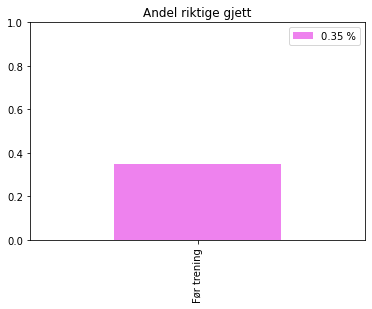

In [4]:
andel = lambda kol: df_turing.iloc[3][kol]/df_turing[kol].sum()

df_turing.loc["Andel riktig"] = [andel("Før trening")]

#Plotter:
df_turing.loc["Andel riktig"].plot.bar(color=["violet","darkviolet"], 
                                       label=f"{df_turing.loc['Andel riktig']['Før trening']:.2} %")
plt.title("Andel riktige gjett")
plt.ylim([0,1])
plt.legend()
plt.show()

<br>
Til vår overraskelse var det altså ikke mer enn $34 \%$ av de $20$ forsøkspersonene som gjettet riktig. Dette er bedre enn sanndynligheten ved tilfeldige gjettingen; $20 \%$ på hver av kategoriene, men ikke med så veldig mye. Det er ikke urimelig å anta at med litt mer trening vil modellen kunne komme på et nivå hvor det å skille ut det modellproduserte sitatet er tilsvarende tilfeldige gjett.

Som en kavlitativ undersøkelse spurte vi også de som deltok i forsøket om hvorfor de hadde valgt teksten de gjorde. Her er noen av svarene: 

> "Jeg gjetter nummer 2, mindre patos, konsis setningsoppbygging og mindre kreativt språk, refererer ikke til konkrete hendelser eller sitater. Nå har ikke jeg peiling på algoritmer til bruk i tekst på denne måten. Det kan også være nummer fem, tipper algoritmer er gode på å ikke gjenta ord."


> “Kan være hvilken som helst”
..“- Hvordan kan en maskin sitere noen?”


> “Jeg tenkte fire pga mange sitater som er lett gjenkjennbare, samt litt stive setninger.” **(gjettet riktig)**


> “Herregud det var vanskelig....nr 3 kanskje? Den sparer liksom ikke på kruttet om jeg kan si det sånn Nei jeg aner ikke…”



Ser dermed at det er ulike heuristikker som brukes for å luke ut språkmodellen; noen med mer hell enn andre.

Med denne motivasjonen i bakhodet ønsket vi å gjøre et forsøk på å forbedre modellen ved å fintrene på et eller flere gitt(e) datasett. Å trene en språkmodell krever store mengder relevant data i form av, for eksempel, artikler. For å komme fram til et slikt datasett prøvde vi flere ulike metoder. 

### **Søken etter datasett**

Vi ønsket å finne et datasett som omhandlet klima, og ettersom modellen allerede hadde et ganske godt språk tenkte vi at å trene den på konseptet klimaendringer var en god idé. I søken etter dette henvendte vi oss til platformene Kaggle og Huggingface, hvor vi fant mange datasett, men der samtlige var nummeriske og derfor lite egnet til å trene en språkmodell. Et unntak var et par twitter-datasett om klimaendringer, men disse viste seg upraktiske fordi modellen trent på dem kun produserte én-setnings-sitater.

Vi fikk deretter ideen om å finne artikler på egenhånd og samle tekst derifra ved å bruke _web scraping_ &ndash; en metode som henter inn teksten fra en gitt nettside gjennom siden HTML-kode. Tanken var å "skrape" teksten fra 1000 artikler om klimaendringer på nature.com (se listen i [2]) og eventuelt de litt over 600 Wikipedia-artiklene som omhandler temaet (se oversikten i [3]). På grunn av vanskeligheter med å generalisere koden, og fallende interesse for å bruke denne innfallsvinkelen, endte vi til slutt kun opp med å skrape artiklene fra _Nature_, resulterende i en tekstfil på 39 MB (filen, ```articles.txt```, ligger vedlagt). Siden ville det vise at dette ikke var helt ideelt. 

Samtidig lekte vi videre med tanken på å forbedre modellens generelle språk framfor klimaendringer spesifikt, ettersom det var enklere å finne datasett til dette formålet. Vi fikk nyss om arXiv-datasettene, som inneholder en rekke naturvitenskapelige artikler. Men, selv om disse datasettene var store (større enn de vi hadde fått gjennom skrapingen tidligere), drev det høyakademiske naturvitenskapelige språket språkmodellen bort fra konseptet klimaendringer. Plutselig ble modellen blant annet overbevist om at klimaendringer var en matematisk formel. 

I et siste forsøk på å finne datasett, satset vi mer på et folkelig innhold, noe som ledet oss til settene ```all_the_news``` (nærmere 150 000 artikler hentet fra store amerikanske mediehus, se figur 1) og ```un_general_debates``` (uttalelser fra FNs årlige generalforsamling i årene 1970-2016), ```fake_and_real_news``` (artikler som er klassifisert som "fake news") hvor samtlige er fra Kaggle. 



![](.\figures\all_the_news_sources.png)
<center> Figur 1: Oversikt over antall artikler fra tilhørende mediehus i datasettet <code>all_the_news</code>.
    <center\>

### **Problemer og "suksess"**

Det viste seg etter hvert at uansett hvilket datasett og treningsparamentre vi brukte, så ble språkmodellen dårligere enn før treningen. Et av de største gjentagende problemene vi støtte på, var gjentagelse. Et av de største gjentagende problemene vi støtte på, var gjentagelse. Ettesom det ikke lot seg løse ved å endre på parametrene, tror vi begrunnelsen kan være for små datasett. Dette synes godt i figur 2, hvor språkmodellen bare hadde blitt trent på det 39 MB store datasettet vi fikk fra _web scrapingen_. Dermed ble det uaktuelt å bruke dette datasettet. Koden til skraperen kan likevel finnes som vedlegget ```web_scraper.py```, og datasettet vi lagde er i filen ```articles.txt```.

![](.\figures\cc_scrape_generated_text.png)
<center> Figur 2: Genererte tekster etter fintrening med datasettet fra <i> web scrapingen. <i\>
    <center\>

Problemer fikk vi også med for store filer, som gjorde krav på mer RAM enn de 13 GB en Kaggle notebook med CPU akselerator kunne levere. Som en torne satt denne i oss i lang tid, og løsningen ble litt slutt at vi måtte kutte ned størrelsen på datasettene. Et klassisk scenario når vi prøvde å bruke hele ```all_the_news```-datasettet, vises i figur 3.

![](.\figures\too_little_memory_error.png)
<center> Figur 3: Feilmelding ved overgått RAM i en Kaggle notebook.
    <center\>

Selv om modellen tilsynelatende presterte dårligere enn før treningen, ønsket vi å se hvordan modellen presterte i en tilsvarende lavterskel Turingtest som før treningen. Datasettet som endte opp med å gi det beste resultatet var en andel av ```all_the_news```. Sammenlignet med før treningen brukte vi flere forsøk på å finne et godt sitat uten mye repetitivt språk. 

Til treningen leste vi inn dataen til pandas data frames, tok den relevante delen over i lister som vi så gjorde til treningsdata via ```TokenDataset```. 

In [ ]:
df_a1 = pd.read_csv("../input/all-the-news/articles1.csv")
df_a2 = pd.read_csv("../input/all-the-news/articles2.csv")
df_a3 = pd.read_csv("../input/all-the-news/articles3.csv")

In [ ]:
list_a1 = list(df_a1.content)[:30000]          #ble nødt til å gjøre dette for å ikke maxe ut minnet
training_data_a1 = TokenDataset(texts=list_a1)

list_a2 = list(df_a2.content)[:30000]
training_data_a2 = TokenDataset(texts=list_a2)

list_a3 = list(df_a3.content)[:30000]
training_data_a3 = TokenDataset(texts=list_a3)

 Som tidligere, lagde vi en instans fra ```aitextgen```, og nå trente vi denne på treningsdataen fra ```all_the_news```. Dessverre kunne vi ikke kombinere hele datasettet til ett treningssett uten å få feilmeldingen fra figur 3, og vi ble dermed nødt til å trene modellen i etapper. 

In [ ]:
ai_news = aitextgen(model_name="gpt-small", to_gpu=True)

In [ ]:
ai_news.train(training_data_a1, 
        line_by_line=True,
        from_cache=False,
        num_steps=100,
        learning_rate=1e-4,
        fp16=False,
        batch_size=1
        )

In [ ]:
ai_news.train(training_data_a2, 
        line_by_line=True,
        from_cache=False,
        num_steps=100,
        learning_rate=1e-4,
        fp16=False,
        batch_size=1
        )

In [ ]:
ai_news.train(training_data_a3, 
        line_by_line=True,
        from_cache=False,
        num_steps=100,
        learning_rate=1e-4,
        fp16=False,
        batch_size=1
        )

In [ ]:
ai_news.generate(n=5,prompt='Climate change is', max_length=100)

Linjen over kjørte vi til vi fant et godt sitat. Det vi til slutt valgte er vist i figur 4.

![cc_test2.png](.\figures\cc_test2.png)
<center> Figur 4: Teksten vi til slutt gikk for. <center\>

### **Test av trent modell**

Det som nå gjenstod var å finne ut om vår generelle oppfatning av at modellen hadde blitt dårligere etter trening ble gjenspeilet i en lavterskel Turingtest. Vi beholdt de menneskeproduserte sitatene fra forrige runde, og spurte så en rekke nye indivder om å gjette på hvilket av sitatene en språkmodell hadde generert. Igjen leste vi svarene manuelt inn i en data frame og plottet resultatet. 

In [8]:
df_turing = df_turing.drop('Andel riktig')

data_etter_trening = [3,5,5,14,0]
df_turing["Etter trening"] = data_etter_trening

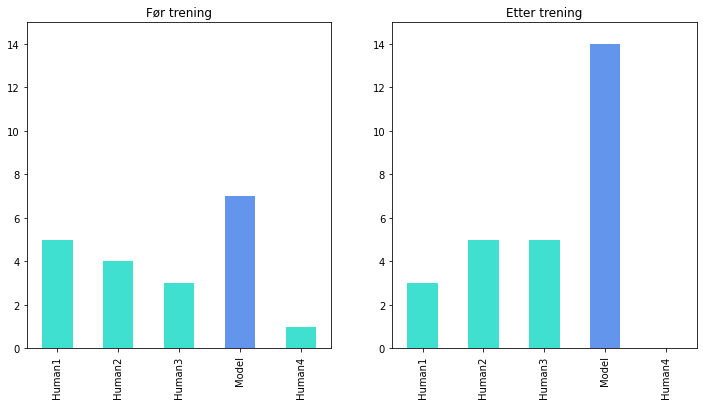

In [9]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
df_turing["Før trening"].plot.bar(color=my_colors)
plt.title("Før trening")
plt.ylim([0,15])

plt.subplot(1,2,2)
df_turing["Etter trening"].plot.bar(color=my_colors)
plt.title("Etter trening")
plt.ylim([0,15])

plt.show()

Her kan vi se at en betraktlig større andel gjettet på modellen denne gangen. 

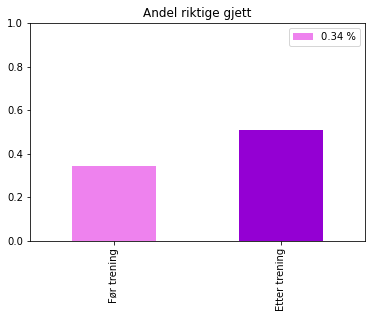

Før trening      0.344080
Etter trening    0.508926
Name: Andel riktig, dtype: float64


In [39]:
df_turing.loc["Andel riktig"] = [andel("Før trening"),andel("Etter trening")]

df_turing.loc["Andel riktig"].plot.bar(color=["violet","darkviolet"]) 
                                      
plt.title("Andel riktige gjett")
plt.ylim([0,1])
plt.legend([f"{df_turing.loc['Andel riktig']['Før trening']:.2} %", 
            f"{df_turing.loc['Andel riktig']['Etter trening']:.2} %"])

plt.show()

print(df_turing.loc["Andel riktig"])

<br>
Som vi kan se i dette plottet presterte modellen bedre før vi trente den. Over halvparten av forsøkspersonene etter treningen gjettet riktig på modellens sitat. Her er igjen noen sitater fra forskningsdeltagerne: 

> "Serr, i tenkte det ikke va den (nr. 4) fordi den refererte til en kilde! Men no kan i iiiingenting om algoritma ogsånn da."


> "En pekepinn var at jeg følte det var den ut av de 5 som var mest presentering av fakta, følte de andre var mer formulert med litt mer menneskelighet." (**gjettet riktig**)


> "...følte 2 fordi den startet to setninger på rad med «Climate change»"
 

> "jeg gjetter på 3 fordi det ikke var brukt ord som «our» og «we» der:)"

> "va det rett?? må si det va litt flaks da, i hadde lite peiling!" (**gjettet riktig**)


Igjen ser vi at ulike antagelser om hva en "algoritme" kan gjøre er med på å avgjøre hvilket sitat de gjetter på. Selv om dette resultatet stemte overens med vår antagelse, finnes det her mange feilkilder; kanskje spesielt når det kommer til utvelgelsen av modellens sitat. Det er for eksempel mulig at modellens bidrag i første omgang var mer lik de menneskelig produserte tekstene enn i andre omgang eller at menneskene som var med i andre omgang har mer kjennskap til algoritmer og språkmodeller. Dette var ment som et lavterskel eksperiment, og derfor er det ikke overraskende at det er forbedringsprotensiale i selve forsøket


### **Videre utforskning av datasett**

Til slutt er det interessant å spørre seg hvilken effekt hadde ulike datasett hadde hatt dersom treningen hadde vært mer vellykket? Vi ønsker derfor å trekke fram resultater fra noe av treningen på andre datasett som ikke kvalifiserte seg som språksterke nok til å bli med på Turingtesten, men likevel belyser viktige aspekter av språkmodeller og deres nytteverdi. De mest spennende eksemplene innenfor dette kom med datasettene ```un_general_debates``` og ```fake_and_real_news```. 

Modellen trent på ```un_general_debates```-datasettet la seg i en veldig samlende "we"-tone, som vi kan se fra det genererte tilfellet under;

> Climate change is a threat to the environment and the quality of life and the environment of the planet. We will continue to work with the international community to find solutions to the problems that are threatening the planet. The United Nations has been a major catalyst for the international community's efforts to end the conflict in the Middle East. The United Nations had given unprecedented credibility to the struggle for peace, stability and develoment. The United Nations has also provided vital support in the efforts to find the solution to

Dette er imidlertidig ikke særlig overraskende ettersom datasettet innholder apeller holdt for å engasjere og fremme et helt lands internasjonale politiske ståsted. Likevel er det påfallende hvor fort den, i dette eksempelet, går bort fra det generelle konseptet "climate change". 

En annen innfallsvinkel vi så for oss, var å kombinere datasettene ```un_general_debates``` og ```all_the_news```, og deretter fintrene språkmodellen på dette kombinerte settet. På denne måten kunne vi hente fra flere kilder, uten at datamengden ble farlig stor (vi var tross alt hemmet av en begrensning på 13 GB RAM &ndash; en hemning som kom til å hjemsøke oss i store deler av treningen). Etter første gjennomkjøring genererte språkmodellen følgende streng, som til slutt ble én av de to tekstene vi vurderte: 

> "Climate change is coming, and the need for the United Nations to act quickly is a fundamental pillar of international security. It has become a matter of faith that the United Nations will continue to fulfil its mandate to set its own agenda for the international community, whether it is a set of actions taken by the United Nations or a series of initiatives initiated by the United Nations Secretary General. "

Selv om denne teksten var sterkt preget av FN, så mente vi likevel at den hadde visse "menneskelige" elementer som ville tjene dens troverdighet. 

Til slutt ønsket vi å ytterligere undersøke hvordan modellens språk endret seg ved ulike datasett, spesielt hvis vi brukte ```fake_news```-datasettet fra Kaggle. Interessant er det å se hvordan modellen, selv om innholdet er feil, likevel klarer å skrive objektivt troverdig, noe figur 5 gir et hint om. 

![cc_fake_news_1.png](.\figures\cc_fake_news_1.png)
<center> Figur 5: Generert tekst etter at modellen hadde blitt trent på datasettet <code>fake_news</code>.

Det er ingen tvil om at datasettene vi trente modellen på, sterkt påvirket orlyden og innholdet den genererte. Dette betyr at dersom det generelle språket forbedres, vil språkmodellen potensielt kunne spesialtilpasses og anvendes på en rekke ulike områder. Om dette vil være moralsk rett å gjøre, og i så fall hvem som skal ha tilgang på et slikt verktøy er et spørsmål for videre diskusjon, nærmere bestemt i den etiske rapporten. 

# Kilder
Da ingen av kildene under hadde noen hensiktsmessig stabil URL eller kildereferanse, har vi her bare gjengitt de etter nettadressen.

[1] https://openai.com/blog/better-language-models/ <br>
[2] https://www.nature.com/subjects/climate-change/srep?searchType=journalSearch&sort=PubDate&page=1 <br>
[3] https://en.wikipedia.org/wiki/Index_of_climate_change_articles <br>